# **Model**: The applicant should provide his/her skills set and desired role; the model should be able to predict if the candidate has been shortlisted for interview or not. If the candidate is not shortlisted for interview; model should be able inform the skill gap.

# Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [0]:
# !pip install xlrd

In [174]:
data = pd.read_excel("sample_data_v4.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Application ID              2168 non-null   object
 1   Current City                2168 non-null   object
 2   Other skills                2130 non-null   object
 3   Institute                   2155 non-null   object
 4   Degree                      2083 non-null   object
 5   Stream                      2071 non-null   object
 6   Current Year Of Graduation  2168 non-null   int64 
 7   Performance_PG              351 non-null    object
 8   Performance_UG              1834 non-null   object
 9   Performance_12              1388 non-null   object
 10  Performance_10              1288 non-null   object
dtypes: int64(1), object(10)
memory usage: 186.4+ KB


In [175]:
data.head()

,Application ID,Current City,Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,MS0001,Pune,"Machine Learning, Python",Don Bosco Institute of Technology,Bachelor of Engineering (B.E),Mechanical Engineering,2018,NaN,8.13/10,NaN,NaN
1,MS0002,Pune,"Machine Learning, Python","PES MCOE, Pune",Bachelor of Engineering (B.E),Electronics and Telecommunication Engineering ...,2018,NaN,66.00/100,NaN,NaN
2,MS0003,Navi Mumbai,"Data Analytics, Data Science, Machine Learning...",Imarticus Learning,PG Diploma in Data Science,NaN,2020,NaN,7.00/10,NaN,NaN
3,MS0004,Bangalore,"Data Analytics, Algorithms, C Programming, Dat...",Dayananda Sagar Institutions,Bachelor of Technology (B.Tech),Information Technology,2022,NaN,NaN,86.80/86.80,10.00/10.00
4,MS0005,Mumbai,"Artifical Intelligence, Computer Vision, Deep ...",Pillai Hoc College Of Engineering And Technolo...,Bachelor of Engineering (B.E),Information Technology,2020,NaN,6.22/10,NaN,NaN


# Cleaning and Preprocesssing Data


In [0]:
# Droping null values in the "Other skills" column
data.dropna( subset=["Other skills"], inplace = True )

### Converting string data to list 

In [177]:
skills = []
for ix in data["Other skills"]:
    # Spliting skillset string and making a list of it
    skills.append(ix.split(", "))


#Skills of first 2 applicants
skills[:2]

[['Machine Learning', 'Python'], ['Machine Learning', 'Python']]

In [178]:
#Creating new columns to store the list of new features
data["skillset"] = skills
# data.drop(columns = ['Application ID', 'Current City', 'Other skills'], inplace=True)
data.head()

,Application ID,Current City,Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,skillset
0,MS0001,Pune,"Machine Learning, Python",Don Bosco Institute of Technology,Bachelor of Engineering (B.E),Mechanical Engineering,2018,NaN,8.13/10,NaN,NaN,"[Machine Learning, Python]"
1,MS0002,Pune,"Machine Learning, Python","PES MCOE, Pune",Bachelor of Engineering (B.E),Electronics and Telecommunication Engineering ...,2018,NaN,66.00/100,NaN,NaN,"[Machine Learning, Python]"
2,MS0003,Navi Mumbai,"Data Analytics, Data Science, Machine Learning...",Imarticus Learning,PG Diploma in Data Science,NaN,2020,NaN,7.00/10,NaN,NaN,"[Data Analytics, Data Science, Machine Learnin..."
3,MS0004,Bangalore,"Data Analytics, Algorithms, C Programming, Dat...",Dayananda Sagar Institutions,Bachelor of Technology (B.Tech),Information Technology,2022,NaN,NaN,86.80/86.80,10.00/10.00,"[Data Analytics, Algorithms, C Programming, Da..."
4,MS0005,Mumbai,"Artifical Intelligence, Computer Vision, Deep ...",Pillai Hoc College Of Engineering And Technolo...,Bachelor of Engineering (B.E),Information Technology,2020,NaN,6.22/10,NaN,NaN,"[Artifical Intelligence, Computer Vision, Deep..."


In [179]:
#The new column values are list as we expected!
type(data['skillset'][0])

list

## We have missing rows in this dataset, which cant  be accessed or iterated

In [0]:

data.drop(columns=['Application ID', 'Current City', 'Other skills','Institute', 'Degree', 'Stream', 'Current Year Of Graduation',
       'Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10'], inplace=True)

In [181]:
data["skillset"][335:340]

#Look 338 isnt there, and its creating problem on iteration and selecting row no.

335    [Android, C++ Programming, Data Structures, En...
336    [Adobe Photoshop, C Programming, C++ Programmi...
337    [CSS, HTML, JavaScript, Machine Learning, Pyth...
339       [Python, C Programming, C++ Programming, Java]
340    [Algorithms, C++ Programming, Data Analytics, ...
Name: skillset, dtype: object

In [0]:
# You can see by running this .
# data[:][338]

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2645             try:
-> 2646                 return self._engine.get_loc(key)
   2647             except KeyError:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 338

During handling of the above exception, another exception occurred:

KeyError                                  Traceback (most recent call last)
2 frames
/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2646                 return self._engine.get_loc(key)
   2647             except KeyError:
-> 2648                 return self._engine.get_loc(self._maybe_cast_indexer(key))
   2649         indexer = self.get_indexer([key], method=method, tolerance=tolerance)
   2650         if indexer.ndim > 1 or indexer.size > 1:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 338

## As we have missing rows int the data , so i have created a new dataframe with values of old dataframe to solve the problem.

In [0]:
clean = pd.DataFrame(data.values, columns=data.columns )

In [184]:
# Rows are iterable in this dataframe
clean["skillset"][330:340]

330    [Arduino, Artifical Intelligence, C++ Programm...
331    [Bootstrap, HTML, Python, SQL, CSS, Django, Fl...
332    [C Programming, Data Analytics, Data Structure...
333    [C Programming, Python, Deep Learning, Image P...
334    [Creative Writing, MS-Excel, Python, Adobe Pho...
335    [Android, C++ Programming, Data Structures, En...
336    [Adobe Photoshop, C Programming, C++ Programmi...
337    [CSS, HTML, JavaScript, Machine Learning, Pyth...
338       [Python, C Programming, C++ Programming, Java]
339    [Algorithms, C++ Programming, Data Analytics, ...
Name: skillset, dtype: object

## Creating a set for all the skills entered in the data


In [185]:
clean.head()

,skillset
0,"[Machine Learning, Python]"
1,"[Machine Learning, Python]"
2,"[Data Analytics, Data Science, Machine Learnin..."
3,"[Data Analytics, Algorithms, C Programming, Da..."
4,"[Artifical Intelligence, Computer Vision, Deep..."


## Creating a set of all the sets entered by the applicants

In [186]:
thisset = {"",}
for ix in skills:
    for j in ix:
        thisset.add(j)
thisset.remove("")
print("There are ",len(thisset), " different skills entered by the applicants") # 255 unique skills entered in the datasets

There are  255  different skills entered by the applicants


## Required Skills [Criteria]:
### Web Developer: 
HTML, CSS, Bootstrap, AJAX, JavaScript, PHP, MySQL, REST API, AWS/GCP,
Git/GitHub, Python, Linux, JSON, Authentication/Authorization (JWT)
### FullStack Developer:
HTML, CSS, MongoDB, Express, React.js, Node.js, ES6, Redux,
JavaScript, AWS/GCP, Python, Linux, JSON, Authentication/Authorization (JWT)
### ML Developer: 
Python, TensorFlow, PyTorch, NumPy, PyPI, Sci-kit learn, Statistical
Modelling, Machine Learning, Deep Learning, SQL, JSON, AWS/GCP/Heroku, Flask

In [0]:
#  PROBLEMS:
# All the required skills are not present in dataset
# ie some required skills are not at all present in the dataset
# Some skills name are written differently by different applicants


### AWS
 - 'Amazon Web Server (AWS)'
 - 'Amazon Web Services (AWS)'

### GCP
 - 'Google Cloud Computing' ,Google Cloud Platform

### Git/GitHub
 - GitHub

### Express
 - Express.js

### AWS/GCP/Heroku      
 - heroku
 
---------------------------------------

### NOT FOUND
 - ES6, 
 - Pytorch, 
 - Numpy, 
 - Pypi, 
 - Sci-kit learn, 
 - Statistical Modelling, 
 - Authentication/Authorization (JWT), 
 - TensorFlow

## What we should done is:
  -  we will write all the different names of one skill as column name and use string.find() function to check whether the skill entered by applicant is present in the portion of column name (all names of same dataset).
  - Mostly every skills has completely different 
  - One problem is with Java and JavaScript as Java is present in column name JavaScript so we can write an if else for this case
   

## Containing those columns which are present in dataset

In [0]:
# So we can assign combined column names which will help in labeling data.
modified_columns = [ ' HTML ', ' CSS ', ' Bootstrap ', ' AJAX ', ' JavaScript ', ' PHP ' , ' MySQL SQL ', ' REST API ', ' AWS Amazon Web Server (AWS) Amazon Web Services (AWS) ',' GCP Google Cloud Computing Google Cloud Platform ', ' Git GitHub ', ' Python ', ' Linux ', ' JSON ', ' MongoDB ', ' Express.js ', ' React.js REACTJS ', ' Node.js ' , ' Redux ', ' Machine Learning ', ' Deep Learning ', ' Flask ', ' Heroku ', ]

In [189]:
len(modified_columns)

23

In [190]:
thisset = {"",}
skills = []
for ix in clean["skillset"]:
    for j in ix:
        thisset.add(j)
        skills.append(j)
thisset.remove("")
print(len(thisset))
%load_ext google.colab.data_table
skills = pd.DataFrame(skills, columns=['SKILL'])
values = skills['SKILL'].value_counts().keys().tolist()
counts = skills['SKILL'].value_counts().tolist()


255
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [191]:
# Count of each skills entered by applicants
z = 0
for i,j in zip(values, counts):
  print(j,"\t:  ",i) 
  z = z+1
  if(z==10):   # top 10 most occuring skills
    break

1860 	:   Python
1449 	:   Machine Learning
832 	:   C Programming
735 	:   Data Analytics
716 	:   C++ Programming
710 	:   Java
698 	:   HTML
634 	:   SQL
634 	:   Deep Learning
608 	:   MS-Excel


## Creating Dataset with columns denoting skills and having values 0 & 1.
 ### 0 : Doesnt have that skill
 ### 1: Have that skill


In [0]:
zero_ = np.zeros((2130,len(modified_columns)))
new_data = pd.DataFrame(zero_, columns=modified_columns)

In [193]:
clean = pd.DataFrame(data.values, columns=data.columns )

train = [clean, new_data]
final = pd.concat(train, axis=1)

final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   skillset                                                 2130 non-null   object 
 1    HTML                                                    2130 non-null   float64
 2    CSS                                                     2130 non-null   float64
 3    Bootstrap                                               2130 non-null   float64
 4    AJAX                                                    2130 non-null   float64
 5    JavaScript                                              2130 non-null   float64
 6    PHP                                                     2130 non-null   float64
 7    MySQL SQL                                               2130 non-null   float64
 8    REST API                   

In [194]:
final.columns

Index(['skillset', ' HTML ', ' CSS ', ' Bootstrap ', ' AJAX ', ' JavaScript ',
       ' PHP ', ' MySQL SQL ', ' REST API ',
       ' AWS Amazon Web Server (AWS) Amazon Web Services (AWS) ',
       ' GCP Google Cloud Computing Google Cloud Platform ', ' Git GitHub ',
       ' Python ', ' Linux ', ' JSON ', ' MongoDB ', ' Express.js ',
       ' React.js REACTJS ', ' Node.js ', ' Redux ', ' Machine Learning ',
       ' Deep Learning ', ' Flask ', ' Heroku '],
      dtype='object')

In [195]:
#Initially all values are 0 , we will check whether the skills mentioned in the column name are there in skillset , and then assigning 1 if present
final.head()

,skillset,HTML,CSS,Bootstrap,AJAX,JavaScript,PHP,MySQL SQL,REST API,AWS Amazon Web Server (AWS) Amazon Web Services (AWS),GCP Google Cloud Computing Google Cloud Platform,Git GitHub,Python,Linux,JSON,MongoDB,Express.js,React.js REACTJS,Node.js,Redux,Machine Learning,Deep Learning,Flask,Heroku
0,"[Machine Learning, Python]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[Machine Learning, Python]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[Data Analytics, Data Science, Machine Learnin...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[Data Analytics, Algorithms, C Programming, Da...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[Artifical Intelligence, Computer Vision, Deep...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Assigning Labels:

In [196]:
# Assigning values
for ix in range(len(final['skillset'])):
    for j in final['skillset'][ix]:
      for col in modified_columns:


        #checking whether the skill entered is present even in the sub part of the column name or not.
        if(col.lower().find(j.lower()) != -1 ):

          # handling our exception case of Java and JavaScript
          if(col == "JavaScript" and j=="Java"):    
              pass
          else:  
            final[col][ix] = 1
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [197]:
#Droping skillset column
final.drop(columns=["skillset"], inplace=True)
final.head()

,HTML,CSS,Bootstrap,AJAX,JavaScript,PHP,MySQL SQL,REST API,AWS Amazon Web Server (AWS) Amazon Web Services (AWS),GCP Google Cloud Computing Google Cloud Platform,Git GitHub,Python,Linux,JSON,MongoDB,Express.js,React.js REACTJS,Node.js,Redux,Machine Learning,Deep Learning,Flask,Heroku
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [198]:
# Counts of each skill required for selection
for col in modified_columns:
  print(final[col].value_counts())


0.0    1432
1.0     698
Name:  HTML , dtype: int64
0.0    1612
1.0     518
Name:  CSS , dtype: int64
0.0    1972
1.0     158
Name:  Bootstrap , dtype: int64
0.0    2105
1.0      25
Name:  AJAX , dtype: int64
0.0    1233
1.0     897
Name:  JavaScript , dtype: int64
0.0    1902
1.0     228
Name:  PHP , dtype: int64
0.0    1168
1.0     962
Name:  MySQL SQL , dtype: int64
0.0    2095
1.0      35
Name:  REST API , dtype: int64
0.0    2072
1.0      58
Name:  AWS Amazon Web Server (AWS) Amazon Web Services (AWS) , dtype: int64
0.0    2083
1.0      47
Name:  GCP Google Cloud Computing Google Cloud Platform , dtype: int64
0.0    2020
1.0     110
Name:  Git GitHub , dtype: int64
1.0    1860
0.0     270
Name:  Python , dtype: int64
0.0    2002
1.0     128
Name:  Linux , dtype: int64
0.0    2110
1.0      20
Name:  JSON , dtype: int64
0.0    1985
1.0     145
Name:  MongoDB , dtype: int64
0.0    2107
1.0      23
Name:  Express.js , dtype: int64
0.0    2040
1.0      90
Name:  React.js REACTJS , dtype

## CREATING NEW CLEAN DATA

## Adding labels

In [0]:
# 0 means not shortlisted and 1 means shortlisted
final["WEB"] = 0
final["FULLSTACK"] = 0
final["ML"] = 0

##Required Skills [Criteria]:
###Web Developer:
- HTML, CSS, Bootstrap, AJAX, JavaScript, PHP, MySQL, REST API, AWS/GCP, Git/GitHub, Python, Linux, JSON, Authentication/Authorization (JWT)

###FullStack Developer:
- HTML, CSS, MongoDB, Express, React.js, Node.js, ES6, Redux, JavaScript, AWS/GCP, Python, Linux, JSON, Authentication/Authorization (JWT)

###ML Developer:
- Python, TensorFlow, PyTorch, NumPy, PyPI, Sci-kit learn, Statistical Modelling, Machine Learning, Deep Learning, SQL, JSON, AWS/GCP/Heroku, Flask

## There are some skills like  **AWS/GCP/Heroku** this means if you have even one of these skills it's fine.
## And others are must_have skills

In [0]:

#Skills required for ML , FULLSTACK AND WEB DEVELOPER respectively
ML_requirements = [' Python ', ' Machine Learning ', ' Deep Learning ', ' MySQL SQL ', ' Flask ', ' JSON ', ' AWS Amazon Web Server (AWS) Amazon Web Services (AWS) ',
                   ' GCP Google Cloud Computing Google Cloud Platform ',' Heroku ']
FULLSTACK_requirements = [' HTML ', ' CSS ' , ' MongoDB ', ' Express.js ', ' React.js REACTJS ', ' Python ', ' Linux ', ' JSON ', ' Node.js ', ' Redux ',' JavaScript ', ' AWS Amazon Web Server (AWS) Amazon Web Services (AWS) ',
                          ' GCP Google Cloud Computing Google Cloud Platform ']
WEB_requirements = [' HTML ', ' CSS ', ' Bootstrap ' , ' AJAX ', ' JavaScript ', ' PHP ' ,' Git GitHub ', ' Python ', ' Linux ', ' JSON '  , ' MySQL SQL ',  ' REST API ', ' AWS Amazon Web Server (AWS) Amazon Web Services (AWS) ',
                          ' GCP Google Cloud Computing Google Cloud Platform ']

In [201]:
# must have skills
ml_must = ML_requirements[:-3]
web_must = WEB_requirements[:-2]
fs_must = FULLSTACK_requirements[:-2]
print("Must have skills for ML: ",len(ml_must))
print("\nMust have skills for WEB: ",len(web_must))
print("\nMust have skills for FULLSTACK: ",len(fs_must))

Must have skills for ML:  6

Must have skills for WEB:  12

Must have skills for FULLSTACK:  11


In [202]:
#Total no. of skills required in each domain.
print("ML req :",len(ML_requirements) , "\nWEB req :",len(WEB_requirements), "\nFULLSTACK req :",len(FULLSTACK_requirements))


ML req : 9 
WEB req : 14 
FULLSTACK req : 13


- Total ML req skills = 7       : (6 must have and 1 out of remaining 3)
- Total WEB req skills = 13       : (12 must have and 1 out of reamining 2)
- Total FULLSTACK req skills = 12 : (11 must have and 1 out of reamining 2)

# Important Note:

## The threshold list is the main thing on how to train the models.
  - it is the deciding factors whether you want to make your model predict no if you have only one sckill missing or you require only 70-80% of the required skills to get selected.


 - I have set it close to total no. of skills .
 - Also the there isnt one candidate in the training data that has all skills required for WEB and FULLSTACK DEVELOPER, so i have to keep it a little low which affects my prediction a little bit.

In [203]:

# i have selected the threshold to be  
#     5/7 skills in ML
#     8/13 skills in WEB
#     8/12 skills in FULLSTACK
threshold = [int(5),int(8),int(8)]


for ix in range(len(final)):

    # Threshold value for getting shortlisted (adding labels)
    ml_threshold = int(0)
    web_threshold = int(0)
    fs_threshold = int(0)
    
    # ML
    # must have skills 
    for must_haves in ml_must:
      if(final[must_haves][ix]==1):
        ml_threshold = ml_threshold + 1
    # Any one of these three
    if(final[" GCP Google Cloud Computing Google Cloud Platform "][ix] == 1 or final[" AWS Amazon Web Server (AWS) Amazon Web Services (AWS) "][ix] == 1 or final[" Heroku " ][ix] == 1):
        ml_threshold = ml_threshold + 1

    # WEB
    # must have skills 
    for must_haves in web_must:
      if(final[must_haves][ix]==1):
        web_threshold = web_threshold + 1
    # Any one of these three
    if(final[" GCP Google Cloud Computing Google Cloud Platform "][ix] == 1 or final[" AWS Amazon Web Server (AWS) Amazon Web Services (AWS) "][ix] == 1 ):
        web_threshold = web_threshold + 1
    
    # FULLSTACK
    # must have skills 
    for must_haves in fs_must:
      if(final[must_haves][ix]==1):
        fs_threshold = fs_threshold + 1
    # Any one of these three
    if(final[" GCP Google Cloud Computing Google Cloud Platform "][ix] == 1 or final[" AWS Amazon Web Server (AWS) Amazon Web Services (AWS) "][ix] == 1 ):
        fs_threshold = fs_threshold + 1 
      


    #As based on the dataset and requirements provided , no one has all the qualities
    #So we should reduce the requirements

    # Applicant is shortlisted if


    # For ML if applicant has 5 out of 7 skills
    if(ml_threshold >= threshold[0]):
      final["ML"][ix] = 1
    
    # For WEB if applicant has 8 out of 13 skills
    if(web_threshold >= threshold[1]):
      final["WEB"][ix] = 1

    # For FULLSTACK if applicant has 8 out of 12 skills  
    if(fs_threshold >= threshold[2]):
      final["FULLSTACK"][ix] = 1
    
    

    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [204]:
# 1 means shortlisted and 0 means not shortlisted
print("Machine Learning\n",final["ML"].value_counts())
print("\n\nWeb Developer\n",final["WEB"].value_counts())
print("\n\nFullStack Developer\n",final["FULLSTACK"].value_counts())

Machine Learning
 0    2086
1      44
Name: ML, dtype: int64


Web Developer
 0    2097
1      33
Name: WEB, dtype: int64


FullStack Developer
 0    2117
1      13
Name: FULLSTACK, dtype: int64


ML claases in training set:



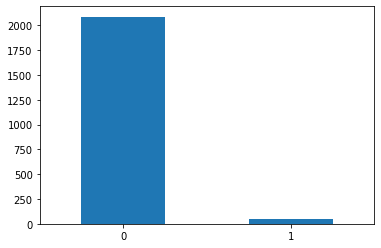


 WEB claases in training set:



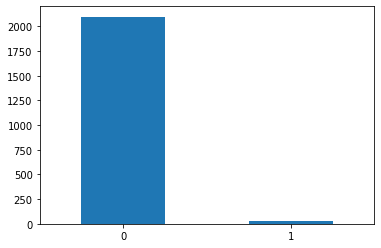


 FULLSTACK claases in training set:



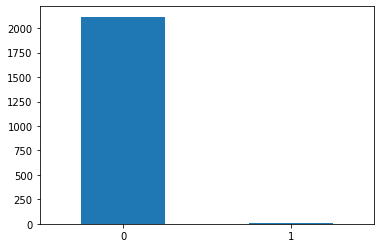

In [205]:
# Visualizing counts
print("ML claases in training set:\n")
count_classes = pd.value_counts(final['ML'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.show()



plt.figure()
print("\n WEB claases in training set:\n")
count_classes = pd.value_counts(final['WEB'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.show()


plt.figure()
print("\n FULLSTACK claases in training set:\n")
count_classes = pd.value_counts(final['FULLSTACK'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.show()



## Its an imbalanced dataset , we should do over-sampling.

# Dataset for training and testing is prepared

In [206]:
dataset = final.copy()
dataset.head()

,HTML,CSS,Bootstrap,AJAX,JavaScript,PHP,MySQL SQL,REST API,AWS Amazon Web Server (AWS) Amazon Web Services (AWS),GCP Google Cloud Computing Google Cloud Platform,Git GitHub,Python,Linux,JSON,MongoDB,Express.js,React.js REACTJS,Node.js,Redux,Machine Learning,Deep Learning,Flask,Heroku,WEB,FULLSTACK,ML
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1


# Train Test Split


In [0]:
ml_train = pd.DataFrame(dataset,columns=ML_requirements)
web_train = pd.DataFrame(dataset,columns=WEB_requirements)
fullstack_train = pd.DataFrame(dataset,columns=FULLSTACK_requirements)
ml_target = pd.DataFrame(dataset, columns=["ML"])
web_target = pd.DataFrame(dataset, columns=["WEB"])
fullstack_target = pd.DataFrame(dataset, columns=["FULLSTACK"])

In [208]:
print(ml_train.shape,ml_target.shape, fullstack_train.shape, fullstack_target.shape)

(2130, 9) (2130, 1) (2130, 13) (2130, 1)


## OverSampling

In [0]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

In [210]:
ml_train, ml_target = os.fit_sample(ml_train, ml_target)
web_train, web_target, = os.fit_sample(web_train, web_target)
fullstack_train, fullstack_target = os.fit_sample(fullstack_train, fullstack_target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, 

In [211]:
from collections import Counter
# print('Original dataset shape {}'.format(Counter(m)))
print('Resampled dataset shape {}'.format(Counter(ml_target)))
print('Resampled dataset shape {}'.format(Counter(web_target)))
print('Resampled dataset shape {}'.format(Counter(fullstack_target)))

Resampled dataset shape Counter({0: 2086, 1: 2086})
Resampled dataset shape Counter({0: 2097, 1: 2097})
Resampled dataset shape Counter({0: 2117, 1: 2117})


ML claases in training set:



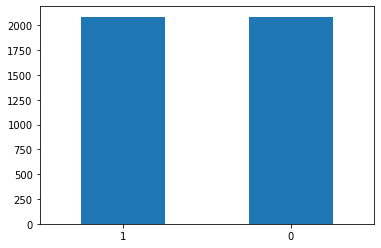


 WEB claases in training set:



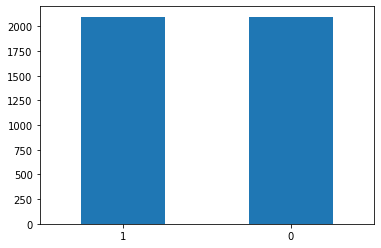


 FULLSTACK claases in training set:



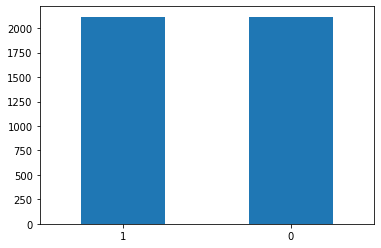

In [212]:
print("ML claases in training set:\n")
count_classes = pd.value_counts(ml_target, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.show()



plt.figure()
print("\n WEB claases in training set:\n")
count_classes = pd.value_counts(web_target, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.show()


plt.figure()
print("\n FULLSTACK claases in training set:\n")
count_classes = pd.value_counts(fullstack_target, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.show()



In [0]:
# Shuffling data

from sklearn.utils import shuffle

ml_train = shuffle(ml_train, random_state=42)
ml_target = shuffle(ml_target, random_state=42)

web_train = shuffle(web_train, random_state=42)
web_target = shuffle(web_target, random_state=42)

fullstack_train = shuffle(fullstack_train, random_state=42)
fullstack_target = shuffle(fullstack_target, random_state=42)

## Helper Functions

In [0]:
from sklearn.metrics import roc_curve

def splitter(X,y,split=0.8):
  X_train = X[:][:int( 0.8*len(X) )]
  X_test = X[:][int( 0.8*len(X) ) :]
  y_train = y[:][:int(0.8*len(X) ) ]
  y_test = y[:][int(0.8*len(X)) :]
  data = [X_train, y_train, X_test, y_test]
  return data


def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
  [...] # Add axis labels and grid

# Model Training

In [0]:
# Opting for logistic Regression Classifier

lg_ml_clf = LogisticRegression(C=100, penalty='l2', class_weight="balanced", solver='lbfgs')
lg_web_clf = LogisticRegression(C=100, penalty='l2', class_weight='balanced', solver='newton-cg')
lg_fs_clf = LogisticRegression(C=100, penalty='l2', class_weight='balanced', solver='newton-cg')

In [0]:
data_list = [ (ml_train, ml_target),    (web_train, web_target) ,    (fullstack_train, fullstack_target) ]
model_list = [(lg_ml_clf, "ML MODEL"), (lg_web_clf, "WEB MODEL"), (lg_fs_clf, "FULLSTACK MODEL")]

In [217]:
data_list[2][0].shape

(4234, 13)

In [0]:
splitted_data = [ ]
for i in np.arange(3):
  splitted_data.append(splitter(data_list[i][0], data_list[i][1]))


In [219]:
splitted_data[0][0].shape

(3337, 9)

## Fiting , Scoring , Evaluating and plotting  Confusion Matrix, ROC Curve

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy of  ML MODEL
0.9988023952095808

Confusion Matrix for  ML MODEL
[[413   1]
 [  0 421]]


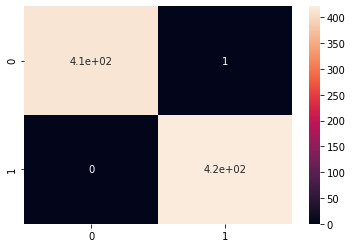

ROC curve:


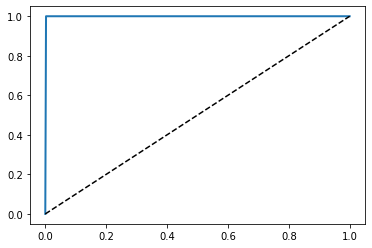

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy of  WEB MODEL
1.0

Confusion Matrix for  WEB MODEL
[[419   0]
 [  0 420]]


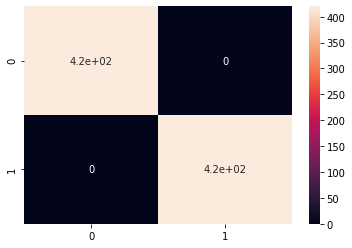

ROC curve:


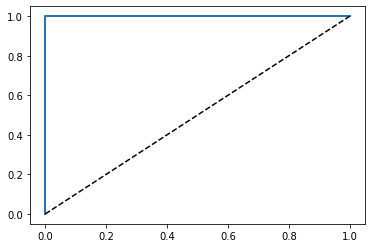

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy of  FULLSTACK MODEL
1.0

Confusion Matrix for  FULLSTACK MODEL
[[418   0]
 [  0 429]]


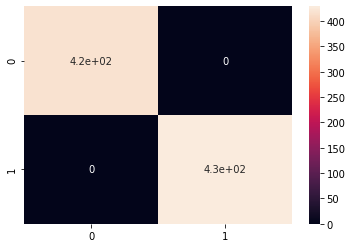

ROC curve:


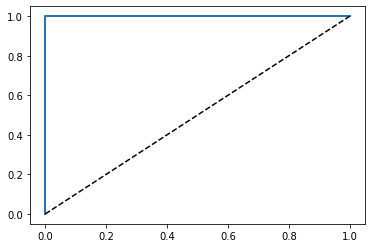

In [220]:
# Fitting each model with their specific training types.
scores = []
i = 0 
for X_train,y_train,X_test,y_test in splitted_data:
  model_list[i][0].fit(X_train,y_train)
  scores.append( (model_list[i][1], model_list[i][0].score(X_test, y_test)) )
  print("~"*75+"\nAccuracy of ",model_list[i][1])
  print( model_list[i][0].score(X_test, y_test))
  print("\nConfusion Matrix for ",model_list[i][1])
  print(confusion_matrix(y_test, model_list[i][0].predict(X_test)) )
  predictions = model_list[i][0].predict(X_test)
  sns.heatmap( confusion_matrix(y_test, predictions), annot=True )
  plt.show()
  print("ROC curve:")
  fpr, tpr, thresholds = roc_curve(y_test, predictions)
  plt.figure()
  plot_roc_curve(fpr, tpr)
  plt.show()
  i = i+1

## Accuracy on TestSet 

In [221]:
print("ACCURACY ON TEST SET :\n",scores)

ACCURACY ON TEST SET :
 [('ML MODEL', 0.9988023952095808), ('WEB MODEL', 1.0), ('FULLSTACK MODEL', 1.0)]


## Though this accuracy is high but its not that great when tested on real data. Let's check on some generated data.

## On generated data it's performance wont be that good

In [0]:
requirements = [ML_requirements, WEB_requirements, FULLSTACK_requirements]

In [0]:

# Function to generate sample cases of applicants and teting our classifer on them.

def generated_data_accuracy(models ,no_of_rows = 100):
  for ix in np.arange(len(models)):
      a = np.random.randint(2, size=(no_of_rows, len(requirements[ix])))
      a = pd.DataFrame(a, columns=requirements[ix])
      
      pred_labels = models[ix][0].predict(a)
      
      true_labels = []
      val = a.values


      for i  in np.arange(len(a)):
        if(np.count_nonzero(val[:][i] == 1) >= threshold[ix]):
          true_labels.append(1)
        else:
          true_labels.append(0)
      
      print("*"*75+"\n\n")
      print(models[ix][1],end="\n\n")
      print("ACCURACY ",accuracy_score(true_labels, pred_labels))
      print("\nConfusion Matrix:\n", confusion_matrix(true_labels, pred_labels))
      print("\nHeatMap")
      sns.heatmap(confusion_matrix(true_labels, pred_labels), annot=True)
      plt.show()
      print("ROC curve:")
      fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)
      plt.figure()
      plot_roc_curve(fpr, tpr)
      plt.show()
      

***************************************************************************


ML MODEL

ACCURACY  0.8806

Confusion Matrix:
 [[3985  995]
 [ 199 4821]]

HeatMap


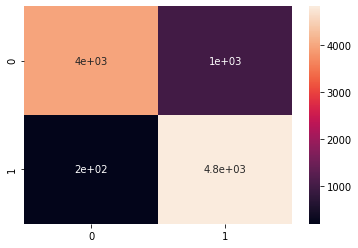

ROC curve:


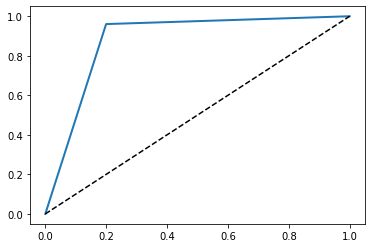

***************************************************************************


WEB MODEL

ACCURACY  0.9958

Confusion Matrix:
 [[6010   42]
 [   0 3948]]

HeatMap


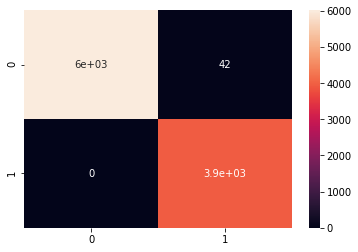

ROC curve:


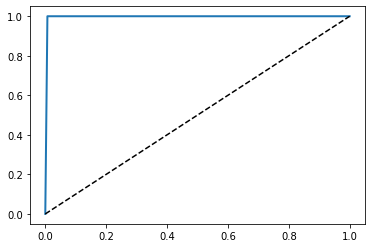

***************************************************************************


FULLSTACK MODEL

ACCURACY  0.9212

Confusion Matrix:
 [[6412  701]
 [  87 2800]]

HeatMap


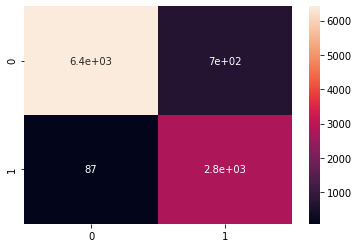

ROC curve:


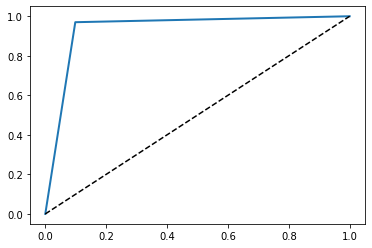

In [224]:
generated_data_accuracy(model_list,10000)

## The classifiers performed well!

# Making our model as described in the task:
- input : 
  - desired role
  - skills
- output :
  - shortlisted or not shortlisted
  - if not shortlisted show the skillgap

In [0]:
class Model:
  def __init__(self):
    """
    Loading the classifiers in the models
    """
    self.models = model_list
 
  def predict_shortlisting(self,desired_role, skills):
    
    """
    Designation
    0 for ML
    1 for WEB
    2 for FULLSTACK
    """

    # designation = eval(input("Enter the designation you want to apply for:\n 0 : MACHINE LEARNING\n 1 : WEB\n 2 : FULLSTACK\n"))
    if(desired_role != 0 and desired_role != 1 and desired_role != 2):
      print("Wrong Designation Entered !")
      return


    skills = skills.split(",")
    skill_list = []
    for skill in skills:
      if len(skill.strip()) <= 1:
        pass
      else:

        skill_list.append((skill.strip()))

    print("\n\nYour skillset :\n",skill_list)
    
    
    # Now preprocessing list values to model input format:

    a = np.zeros( ( 1,len(requirements[desired_role]) ) )
    query = pd.DataFrame(a, columns = requirements[desired_role])   #dataframe
    for column in requirements[desired_role]:
      for skill in skill_list:
        #checking whether the skill entered is present even in the sub part of the column name or not.

        if(column.lower().find(skill.lower()) != -1 ):
          # handling our exception case of Java and JavaScript
          if(column == "JavaScript" and skill=="Java"):    
            pass
          else:  
            query[column][0] = 1

    #Prediction      
    prediction = self.models[desired_role][0].predict(query.values)
    
    print("\n",self.models[desired_role][1].split(" ")[0])
    if(prediction == 0 ):
      
      print("-"*50+"\nNOT SHORTLISTED") 
      skillgap = ""
      for ix in np.arange(query.values.shape[1]):
        if query.values[0][ix] == 0:
          skillgap = skillgap + requirements[desired_role][ix] + ","
      print("Work to compensate the skills shown below :")
      print("SKILLGAP :",skillgap)
    else:
      print("-"*50+"\nSHORTLISTED ")
    
    print("\n\n"+"*"*100)
    return
  



# Making our predictions

In [226]:
M =  Model()
# basic predictions
M.predict_shortlisting(0,"python, machine learning, aws, sql")
M.predict_shortlisting(0,"python, machine learning, aws, sql, Deep learning,flask, heroku")
M.predict_shortlisting(1,"html, css , bootstrap, rest api, javascript, json, mysql")
M.predict_shortlisting(1,"html, css, ajax , bootstrap, git, aws, rest api, php, javascript, json, mysql")
M.predict_shortlisting(2,"javascript, mongodb, express.js, python, aws, gcp, nodejs")
M.predict_shortlisting(2,"javascript, mongodb, express.js, python, aws, gcp, nodejs, reactjs, gcp, redux")





Your skillset :
 ['python', 'machine learning', 'aws', 'sql']

 ML
--------------------------------------------------
NOT SHORTLISTED
Work to compensate the skills shown below :
SKILLGAP :  Deep Learning , Flask , JSON , GCP Google Cloud Computing Google Cloud Platform , Heroku ,


****************************************************************************************************


Your skillset :
 ['python', 'machine learning', 'aws', 'sql', 'Deep learning', 'flask', 'heroku']

 ML
--------------------------------------------------
SHORTLISTED 


****************************************************************************************************


Your skillset :
 ['html', 'css', 'bootstrap', 'rest api', 'javascript', 'json', 'mysql']

 WEB
--------------------------------------------------
NOT SHORTLISTED
Work to compensate the skills shown below :
SKILLGAP :  AJAX , PHP , Git GitHub , Python , Linux , AWS Amazon Web Server (AWS) Amazon Web Services (AWS) , GCP Google Cloud Comput

In [227]:
# if you have ml skills and apply for web it will be a definite rejection
M.predict_shortlisting(1,"python, machine learning, aws, sql, Deep learning")                                     # this profile was selected for ML but not for web
M.predict_shortlisting(2,"html, css, ajax , bootstrap, git, aws, rest api, php, javascript, json, mysql")
M.predict_shortlisting(0,"javascript, mongodb, express.js, python, aws, gcp, nodejs, reactjs, gcp, redux")



Your skillset :
 ['python', 'machine learning', 'aws', 'sql', 'Deep learning']

 WEB
--------------------------------------------------
NOT SHORTLISTED
Work to compensate the skills shown below :
SKILLGAP :  HTML , CSS , Bootstrap , AJAX , JavaScript , PHP , Git GitHub , Linux , JSON , REST API , GCP Google Cloud Computing Google Cloud Platform ,


****************************************************************************************************


Your skillset :
 ['html', 'css', 'ajax', 'bootstrap', 'git', 'aws', 'rest api', 'php', 'javascript', 'json', 'mysql']

 FULLSTACK
--------------------------------------------------
NOT SHORTLISTED
Work to compensate the skills shown below :
SKILLGAP :  MongoDB , Express.js , React.js REACTJS , Python , Linux , Node.js , Redux , GCP Google Cloud Computing Google Cloud Platform ,


****************************************************************************************************


Your skillset :
 ['javascript', 'mongodb', 'express.js', '